<a href="https://colab.research.google.com/github/Varkenes/Redes-Neuronales-para-estimar-Datos-de-Roc-o-con-TF-Keras-/blob/main/C%C3%B3digo_2_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


# **Lectura de datos:**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Redes-Neuronales-para-estimar-Datos-de-Roc-o-con-TF-Keras-/main/Datos_Combarbala_Diarios_2014-2015_Random.csv')

In [ ]:
print(df)

        v    RH    u  N     PA     CW   No
0    14.5  68.6  0.7  2  884.0  0.042  122
1    20.9  48.6  0.6  0  883.4  0.000  130
2    18.4  54.0  0.6  0  887.1  0.028  102
3    14.8  41.4  0.7  8  890.0  0.014  155
4     6.1  96.4  1.0  7  888.7  0.028  183
..    ...   ...  ... ..    ...    ...  ...
183  18.4  28.2  1.1  2  888.5  0.000   42
184  12.6  55.9  0.9  2  887.0  0.000   52
185  13.4  64.3  1.0  8  884.9  0.000   70
186  17.5  61.4  0.8  0  887.5  0.042  108
187  18.8  40.2  0.9  0  886.2  0.028  144

[188 rows x 7 columns]


In [ ]:
dataset = df.values

In [ ]:
print(dataset)

[[1.450e+01 6.860e+01 7.000e-01 2.000e+00 8.840e+02 4.200e-02]
 [2.090e+01 4.860e+01 6.000e-01 0.000e+00 8.834e+02 0.000e+00]
 [1.840e+01 5.400e+01 6.000e-01 0.000e+00 8.871e+02 2.800e-02]
 ...
 [1.490e+01 1.760e+01 9.000e-01 0.000e+00 8.878e+02 0.000e+00]
 [1.630e+01 6.620e+01 9.000e-01 8.000e+00 8.844e+02 2.800e-02]
 [1.700e+01 3.840e+01 1.300e+00 0.000e+00 8.881e+02 0.000e+00]]


# **Definiendo Variables**
Acá se mejoró esta línea de código separando los las variables input y output de prueba (x_train e y_train) y las variables input y output (x_test e y_test), 70 y 30 % respectivamete de manera aleatoria.

In [ ]:
X=dataset[0:,0:5]
Y=dataset[:,5]

In [ ]:
print(X)
entrenamientodedatos = X
np.savetxt("entrenamientodedatos90_10.csv", entrenamientodedatos, delimiter=",")

[[1.450e+01 6.860e+01 7.000e-01 2.000e+00 8.840e+02]
 [2.090e+01 4.860e+01 6.000e-01 0.000e+00 8.834e+02]
 [1.840e+01 5.400e+01 6.000e-01 0.000e+00 8.871e+02]
 [1.480e+01 4.140e+01 7.000e-01 8.000e+00 8.900e+02]
 [6.100e+00 9.640e+01 1.000e+00 7.000e+00 8.887e+02]
 [1.730e+01 6.300e+01 9.000e-01 0.000e+00 8.852e+02]
 [1.670e+01 4.390e+01 7.000e-01 0.000e+00 8.888e+02]
 [1.900e+01 4.540e+01 8.000e-01 0.000e+00 8.841e+02]
 [1.740e+01 2.760e+01 1.000e+00 0.000e+00 8.879e+02]
 [7.200e+00 7.940e+01 1.500e+00 2.000e+00 8.900e+02]
 [7.100e+00 8.610e+01 1.300e+00 8.000e+00 8.882e+02]
 [1.520e+01 6.450e+01 9.000e-01 2.000e+00 8.850e+02]
 [1.430e+01 6.190e+01 6.000e-01 0.000e+00 8.864e+02]
 [1.260e+01 7.950e+01 9.000e-01 2.000e+00 8.864e+02]
 [1.670e+01 6.650e+01 9.000e-01 0.000e+00 8.859e+02]
 [1.490e+01 3.460e+01 8.000e-01 6.000e+00 8.874e+02]
 [6.600e+00 8.180e+01 1.400e+00 0.000e+00 8.926e+02]
 [1.630e+01 5.780e+01 6.000e-01 0.000e+00 8.864e+02]
 [1.230e+01 3.860e+01 1.200e+00 2.000e+00 8.90

In [ ]:
print(Y)
testeodedatos = Y
np.savetxt("testdedatos90_10.csv", testeodedatos, delimiter=",")

[0.042 0.    0.028 0.014 0.028 0.056 0.    0.042 0.056 0.222 0.111 0.028
 0.    0.222 0.028 0.    0.333 0.056 0.    0.111 0.222 0.042 0.167 0.
 0.125 0.    0.056 0.028 0.    0.    0.056 0.125 0.    0.056 0.    0.028
 0.083 0.    0.014 0.028 0.167 0.028 0.    0.    0.014 0.178 0.    0.014
 0.    0.028 0.083 0.056 0.417 0.167 0.083 0.028 0.    0.167 0.    0.
 0.167 0.    0.056 0.    0.    0.111 0.083 0.    0.167 0.222 0.042 0.056
 0.056 0.278 0.028 0.014 0.056 0.    0.    0.    0.    0.    0.042 0.022
 0.056 0.    0.    0.125 0.    0.153 0.056 0.056 0.    0.    0.    0.
 0.042 0.    0.014 0.083 0.056 0.278 0.222 0.    0.028 0.056 0.056 0.
 0.    0.028 0.111 0.    0.    0.    0.    0.028 0.167 0.222 0.25  0.014
 0.014 0.222 0.    0.    0.    0.    0.056 0.    0.042 0.    0.028 0.
 0.014 0.    0.056 0.    0.    0.    0.    0.    0.056 0.    0.    0.167
 0.111 0.083 0.    0.056 0.083 0.014 0.    0.083 0.042 0.    0.028 0.139
 0.194 0.    0.042 0.    0.111 0.042 0.    0.    0.    0.083 0.056

# **El modelo**
## Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que crearemos un segundo modelo, más adelante.

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[5]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.fit(X,Y,epochs=8,verbose=2)

Epoch 1/8
6/6 - 0s - loss: 0.0014 - mae: 0.0274 - mse: 0.0014
Epoch 2/8
6/6 - 0s - loss: 0.0017 - mae: 0.0289 - mse: 0.0017
Epoch 3/8
6/6 - 0s - loss: 0.0010 - mae: 0.0215 - mse: 0.0010
Epoch 4/8
6/6 - 0s - loss: 0.0013 - mae: 0.0250 - mse: 0.0013
Epoch 5/8
6/6 - 0s - loss: 0.0013 - mae: 0.0248 - mse: 0.0013
Epoch 6/8
6/6 - 0s - loss: 0.0012 - mae: 0.0249 - mse: 0.0012
Epoch 7/8
6/6 - 0s - loss: 0.0012 - mae: 0.0247 - mse: 0.0012
Epoch 8/8
6/6 - 0s - loss: 0.0013 - mae: 0.0255 - mse: 0.0013


In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-6q4141h4
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-6q4141h4


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling 

In [ ]:
EPOCHS = 16000

history = model.fit(X,Y,
  epochs=EPOCHS, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0012,  mae:0.0229,  mse:0.0012,  
....................................................................................................
Epoch: 100, loss:0.0017,  mae:0.0299,  mse:0.0017,  
....................................................................................................
Epoch: 200, loss:0.0015,  mae:0.0262,  mse:0.0015,  
....................................................................................................
Epoch: 300, loss:0.0011,  mae:0.0243,  mse:0.0011,  
....................................................................................................
Epoch: 400, loss:0.0011,  mae:0.0237,  mse:0.0011,  
....................................................................................................
Epoch: 500, loss:0.0012,  mae:0.0239,  mse:0.0012,  
....................................................................................................
Epoch: 600, loss:0.0015,  mae:0.0263,  mse:0.0015,  
........................

## **Gráfica Valores Reales V/s Predicción**

0.8220210947321717

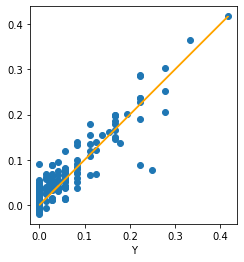

In [ ]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Y, test_predictions)
plt.xlabel('X')
plt.xlabel('Y')
_=plt.plot(Y,Y,color = 'orange')
r2_score(Y, test_predictions)


In [ ]:
prediction = model.predict(X)

print(prediction)

np.savetxt("predict90.csv", prediction, delimiter=",")

[[ 0.04533041]
 [ 0.02141406]
 [ 0.0654847 ]
 [ 0.03774963]
 [ 0.03498003]
 [ 0.02985543]
 [ 0.0495291 ]
 [ 0.05866455]
 [ 0.02862909]
 [ 0.2053789 ]
 [ 0.11403702]
 [ 0.07852563]
 [-0.02185245]
 [ 0.18047458]
 [ 0.02915027]
 [ 0.02735967]
 [ 0.28125215]
 [ 0.04031117]
 [ 0.0306842 ]
 [ 0.14956948]
 [ 0.2053182 ]
 [ 0.02793143]
 [ 0.16015992]
 [ 0.04480141]
 [ 0.03837179]
 [ 0.02411992]
 [ 0.02248638]
 [ 0.05417537]
 [ 0.01017709]
 [ 0.01580456]
 [ 0.0468517 ]
 [ 0.10928065]
 [ 0.02410809]
 [ 0.01886649]
 [ 0.0486101 ]
 [ 0.04492322]
 [ 0.0893271 ]
 [ 0.01508125]
 [ 0.02366882]
 [ 0.07780568]
 [ 0.16631609]
 [ 0.04163215]
 [ 0.01253293]
 [ 0.01530358]
 [ 0.02473073]
 [ 0.10892062]
 [ 0.02123373]
 [ 0.05670387]
 [ 0.04895429]
 [ 0.02765857]
 [ 0.05278462]
 [ 0.07707457]
 [ 0.42980954]
 [ 0.11631952]
 [ 0.07159649]
 [ 0.03416077]
 [ 0.00215048]
 [ 0.06650187]
 [ 0.02485181]
 [ 0.05161443]
 [ 0.08129392]
 [ 0.02400452]
 [ 0.02646802]
 [ 0.05290887]
 [ 0.00840581]
 [ 0.05410819]
 [ 0.00368

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Redes-Neuronales-para-estimar-Datos-de-Roc-o-con-TF-Keras-/main/Testeo%20con%2010.csv')

In [ ]:
dataset2 = df2.values

In [ ]:
Xtest=dataset2[0:,0:5]
Ytest=dataset2[:,5]

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
model.save('my_model')

# load the pb model
model_tf = load_model('my_model')

# predict
pred_tf = model_tf.predict(Xtest)

score_tf = np.sqrt(mean_squared_error(pred_tf,Ytest))
print("After loading score (RMSE): {}".format(score_tf))

INFO:tensorflow:Assets written to: my_model/assets
After loading score (RMSE): 0.12137834647361409


-2.5115953000349145

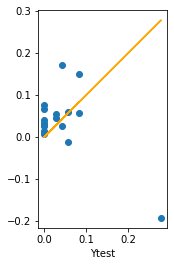

In [ ]:

test_predictions2 = model.predict(Xtest).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Ytest, test_predictions2)
plt.xlabel('Xtest')
plt.xlabel('Ytest')
_=plt.plot(Ytest,Ytest,color = 'orange')
r2_score(Ytest, test_predictions2)

In [ ]:
predict= model.predict(Xtest)

print(predict)

np.savetxt("predict10.csv", predict, delimiter=",")

[[ 0.14979216]
 [-0.19291356]
 [ 0.02769347]
 [-0.01190819]
 [ 0.02892749]
 [ 0.00787816]
 [ 0.04033856]
 [ 0.02598039]
 [ 0.05904741]
 [ 0.0568467 ]
 [ 0.01519317]
 [ 0.17212722]
 [ 0.04423407]
 [ 0.03359778]
 [ 0.06663923]
 [ 0.07590495]
 [ 0.02552199]
 [ 0.05378653]]
